In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv('./usapl_ipf.csv')

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75710 entries, 0 to 75709
Data columns (total 39 columns):
Unnamed: 0        75710 non-null int64
Age               3762 non-null float64
Bench1Kg          55176 non-null float64
Bench2Kg          54805 non-null float64
Bench3Kg          53974 non-null float64
Bench4Kg          12 non-null float64
BestBenchKg       71828 non-null float64
BestDeadliftKg    67206 non-null float64
BestSquatKg       64105 non-null float64
BirthYear         24457 non-null float64
BodyweightKg      69758 non-null float64
Country           8211 non-null object
Date              75710 non-null object
Deadlift1Kg       51182 non-null float64
Deadlift2Kg       50522 non-null float64
Deadlift3Kg       49462 non-null float64
Deadlift4Kg       2 non-null float64
Division          70818 non-null object
Equipment         75710 non-null object
Event             75580 non-null object
Federation        75710 non-null object
MeetCountry       75710 non-null object
MeetNam

In [15]:
df[df['TotalKg'].isnull()]['Event'].value_counts()

SBD    3096
B       421
BD       45
D        21
S         2
Name: Event, dtype: int64

In [16]:
df[df['Event']=='SBD'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66075 entries, 15 to 75709
Data columns (total 39 columns):
Unnamed: 0        66075 non-null int64
Age               2667 non-null float64
Bench1Kg          49423 non-null float64
Bench2Kg          49071 non-null float64
Bench3Kg          48310 non-null float64
Bench4Kg          3 non-null float64
BestBenchKg       63910 non-null float64
BestDeadliftKg    64105 non-null float64
BestSquatKg       63987 non-null float64
BirthYear         22568 non-null float64
BodyweightKg      61776 non-null float64
Country           7924 non-null object
Date              66075 non-null object
Deadlift1Kg       49071 non-null float64
Deadlift2Kg       48438 non-null float64
Deadlift3Kg       47437 non-null float64
Deadlift4Kg       2 non-null float64
Division          61196 non-null object
Equipment         66075 non-null object
Event             66075 non-null object
Federation        66075 non-null object
MeetCountry       66075 non-null object
MeetNam

In [17]:
df.drop(['index', 'Unnamed: 0'], axis = 1, inplace=True)

In [18]:
mask = (df['BirthYear'].isnull()==True) & (df['Age'].isnull()==True) & df['Division'].isnull()

In [19]:
df[mask]['MeetName'].value_counts()

IPF World Men's Powerlifting Championship                         1315
2000 Collegiate National Powerlifting Championships                188
2001 Collegiate National Powerlifting Championships                169
2002 Collegiate National Powerlifting Championships                161
IPF World Men's Powerlifting Championships                         128
1997 USAPL/ADFPA Men's National Powerlifting Championships         102
2002 USAPL Men's National Powerlifting Championships                98
2000 USAPL Men's National Powerlifting Championships                91
1999 USAPL Men's National Powerlifting Championships                90
2005 Men's Open Nationals                                           76
2001 USAPL Men's National Powerlifting Championships                69
1994 IPF Senior World Championships                                 32
California State Collegiate Push/Pull                               12
2000 High School National Powerlifting Championships                11
1998 P

In [20]:
df[mask].shape

(2550, 37)

In [21]:
df['Event'].value_counts()

SBD    66075
B       6433
BD      1804
D       1225
S         34
SB         9
Name: Event, dtype: int64

In [22]:
mask2 = (df['BestBenchKg'].isnull()) & ((df['Bench1Kg'].isnull() == False) | \
                                        (df['Bench2Kg'].isnull() == False) | (df['Bench3Kg'].isnull() == False ))

In [59]:
df[mask2].shape

(1469, 37)

In [53]:
check_squat_mask = (df['BestSquatKg'].isnull()) & ((df['Squat1Kg'].isnull() == False) | \
                                        (df['Squat2Kg'].isnull() == False) | (df['Squat3Kg'].isnull() == False ))

In [57]:
df[check_squat_mask]

(1157, 37)

In [60]:
check_dl_mask = (df['BestDeadliftKg'].isnull()) & ((df['Deadlift1Kg'].isnull() == False) | \
                                        (df['Deadlift2Kg'].isnull() == False) | (df['Deadlift3Kg'].isnull() == False ))

In [419]:
df[check_dl_mask].shape

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(601, 39)

In [62]:
df[mask2].shape[0]+df[check_squat_mask].shape[0]+df[check_dl_mask].shape[0]

3227

In [105]:
df['Division'].unique()

array(['R-T3', 'R-Y', 'R-O', 'R-Y1', 'R-M1a', 'R-M1b', 'M2b', 'R-M2a', 'O',
       'R-T1', 'R-T2', 'JR', 'R-JR', 'M3b', 'M4a', 'R-M2b', 'R-M3a',
       'R-M3b', 'R-M4a', 'R-M4b', 'R-M5a', 'M2a', 'BP', 'HS', 'R-HS', 'T1',
       'R-M5b', 'R-V', 'M', 'R-M', 'T2', 'T3', 'T', 'R-T', 'R-Y2', 'R-Y3',
       'R-M1', 'R-SJr', 'R-M3', 'M3a', 'M1b', 'M1a', 'R-M2', 'R-M6',
       'R-SO', 'R-M4', 'R-M5', 'M4', 'M2', 'M3', 'R-M7', 'R-C', 'R-BP',
       'R-SO-BP', 'R-O-HW', 'R-O-LW', 'R-O-MW', 'R-TJR', 'Y1', 'Y3', 'C',
       'R-FR/SO', 'R-FR/So', 'R-JR/SR', 'R-GL', 'Youth', 'Junior',
       'Masters 40-44', 'Masters 45-49', 'Open', 'Teen 16-17',
       'Masters 65-69', 'Masters 50-54', 'Teen 14-15', 'Teen 18-19',
       'Collegiate', 'Masters 55-59', 'Guest', 'Military', 'Masters 60-64',
       'Masters 70-74', 'Special Olympics', 'Masters 75-79', 'Police/Fire',
       'R-N', 'Y2', 'M4b', 'G', 'R-G', 'OG', 'M1', 'MR-J', 'MR-O', 'R-TJ',
       'R-PF', 'R-MLO', 'R-M-BO', 'R-F-BO', 'M-O', 'R-M-T', 'R-

In [412]:
df[df['Division']== '14-15(T1)']['Age'] = 14.5 

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


63742   NaN
63749   NaN
63786   NaN
63823   NaN
63824   NaN
63847   NaN
63848   NaN
Name: Age, dtype: float64

In [127]:
df[df['Division'] == 'T 14-15']

,Age,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,BestBenchKg,BestDeadliftKg,BestSquatKg,BirthYear,BodyweightKg,...,Sex,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,State,Team,TotalKg,WeightClassKg,Wilks
61962,15.0,-95.0,-107.5,-107.5,NaN,NaN,NaN,NaN,NaN,NaN,...,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN
61963,15.0,-105.0,112.5,-122.5,NaN,112.5,NaN,NaN,NaN,NaN,...,M,NaN,NaN,NaN,NaN,NaN,NaN,112.5,67.5,NaN
61967,14.0,-95.0,-112.5,-112.5,NaN,NaN,NaN,NaN,NaN,NaN,...,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN
61968,15.0,-62.5,62.5,65.0,NaN,65.0,NaN,NaN,NaN,NaN,...,M,NaN,NaN,NaN,NaN,NaN,NaN,65.0,75,NaN
61970,15.0,-140.0,150.0,-160.0,NaN,150.0,NaN,NaN,NaN,NaN,...,M,NaN,NaN,NaN,NaN,NaN,NaN,150.0,82.5,NaN
62037,15.0,-55.0,-60.0,-62.5,NaN,NaN,NaN,NaN,NaN,NaN,...,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN
62038,15.0,-110.0,117.5,122.5,NaN,122.5,NaN,NaN,NaN,NaN,...,F,NaN,NaN,NaN,NaN,NaN,NaN,122.5,75,NaN


In [141]:
division_mask = (df['BirthYear'].isnull()) & (df['Division'].isnull()) & (df['Age'].isnull()) 

In [145]:
df[division_mask]['Team'].count()

260

In [132]:
useless_mask = (df['BestSquatKg'].isnull()) & (df['Squat1Kg'].isnull()) & \
(df['Squat2Kg'].isnull()) & (df['Squat3Kg'].isnull()) &\
(df['BestDeadliftKg'].isnull()) & (df['Deadlift1Kg'].isnull()) & \
(df['Deadlift2Kg'].isnull()) & (df['Deadlift3Kg'].isnull()) &\
(df['BestBenchKg'].isnull()) & (df['Bench1Kg'].isnull()) & \
 (df['Bench2Kg'].isnull()) & (df['Bench3Kg'].isnull())

In [137]:
df['Date'] = pd.to_datetime(df['Date'])

In [140]:
df[useless_mask].shape

(629, 37)

In [147]:
weight_mask = (df['WeightClassKg'].isnull()) & (df['BodyweightKg'].isnull())

In [149]:
df[weight_mask].shape

(80, 37)

In [150]:
df.shape

(75710, 37)

In [151]:
weight_mask2 = (df['WeightClassKg'].isnull()) & (df['BodyweightKg'].isnull()==False)

In [153]:
df[weight_mask2].shape

(571, 37)

In [154]:
weight_mask2 = (df['WeightClassKg'].isnull()==False) & (df['BodyweightKg'].isnull())

In [155]:
df[weight_mask2].shape

(5872, 37)

In [162]:
df['BodyweightKg'].count()

69758

In [197]:
df['WeightClassKg'].unique()

array(['67.5', '52', '82.5', '100', '110', '125+', '125', '75', '56', '90',
       '60', '44', '90+', '66', '83', '105', '59', '74', '120', '93',
       '120+', '63', '72', '84+', '57', '84', '53', '40', '43', '47', '48',
       '105.0', nan, '30', '110.0', '100.0', '75.0', '35', '125.0', '90.0',
       '60.0', '48.0', '63.0', '72.0', '57.0', '52.0', '84.0', '66.0',
       '74.0', '83.0', '93.0', '120.0', '56.0', '44.0', '145', '145+',
       '140.0', '140+', '140', '70', '80', '110+'], dtype=object)

In [216]:
search_upper_limit = ((df['WeightClassKg']=='120+') | (df['WeightClassKg']=='84+') | \
(df['WeightClassKg']=='140+') | (df['WeightClassKg']=='110+') | (df['WeightClassKg']=='125+') | \
(df['WeightClassKg']=='145+')| (df['WeightClassKg']=='90+')) & (df['BodyweightKg'].isnull())

In [217]:
df[search_upper_limit].shape

(108, 37)

In [218]:
df = df[~search_upper_limit]

In [219]:
df.shape

(75304, 37)

In [220]:
def fill_bodyweight(row):
    if np.isnan(row['BodyweightKg']):
        row['BodyweightKg'] = pd.to_numeric(row['WeightClassKg'])
    return row

In [221]:
df2 = df.apply(fill_bodyweight, axis = 1)

In [224]:
print (df2.shape, df.shape)

(75304, 37) (75304, 37)


In [223]:
df2['BodyweightKg'].count()

75224

In [173]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75710 entries, 0 to 75709
Data columns (total 37 columns):
Age               3762 non-null float64
Bench1Kg          55176 non-null float64
Bench2Kg          54805 non-null float64
Bench3Kg          53974 non-null float64
Bench4Kg          12 non-null float64
BestBenchKg       71828 non-null float64
BestDeadliftKg    67206 non-null float64
BestSquatKg       64105 non-null float64
BirthYear         24457 non-null float64
BodyweightKg      75630 non-null object
Country           8211 non-null object
Date              75710 non-null datetime64[ns]
Deadlift1Kg       51182 non-null float64
Deadlift2Kg       50522 non-null float64
Deadlift3Kg       49462 non-null float64
Deadlift4Kg       2 non-null float64
Division          70818 non-null object
Equipment         75710 non-null object
Event             75580 non-null object
Federation        75710 non-null object
MeetCountry       75710 non-null object
MeetName          75710 non-null object

In [174]:
def fill_best(row):
    if np.isnan(row['BestSquatKg']):
        if max(row['Squat1Kg'], row['Squat2Kg'], row['Squat3Kg']) > 0:
            row['BestSquatKg'] = max(row['Squat1Kg'], row['Squat2Kg'], row['Squat3Kg'])
    if np.isnan(row['BestDeadliftKg']):
        if max(row['Deadlift1Kg'], row['Deadlift2Kg'], row['Deadlift3Kg']) > 0:
            row['DeadliftKg'] = max(row['Deadlift1Kg'], row['Deadlift2Kg'], row['Deadlift3Kg'])
    if np.isnan(row['BestBenchKg']):
        if max(row['Bench1Kg'], row['Bench2Kg'], row['Bench3Kg']) > 0:
            row['DeadliftKg'] = max(row['Bench1Kg'], row['Bench2Kg'], row['Bench3Kg'])
    return row

In [175]:
df2 = df2.apply(fill_best, axis = 1)

In [177]:
df2[['BestDeadliftKg', 'BestSquatKg', 'BestBenchKg']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75710 entries, 0 to 75709
Data columns (total 3 columns):
BestDeadliftKg    67206 non-null float64
BestSquatKg       64105 non-null float64
BestBenchKg       71828 non-null float64
dtypes: float64(3)
memory usage: 1.7 MB


In [178]:
df[['BestDeadliftKg', 'BestSquatKg', 'BestBenchKg']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75710 entries, 0 to 75709
Data columns (total 3 columns):
BestDeadliftKg    67206 non-null float64
BestSquatKg       64105 non-null float64
BestBenchKg       71828 non-null float64
dtypes: float64(3)
memory usage: 1.7 MB


In [183]:
def floater(series):
    return pd.to_numeric(series, errors='ignore')

In [193]:
upper_limit_mask = (df['WeightClassKg'] == '125+') & (df['BodyweightKg'].isnull())

In [195]:
df[upper_limit_mask][]

(251, 37)

In [187]:
look_at_sbd_mask = (df['Event']=='SBD') & (df['TotalKg'].isnull()) 

In [239]:
df[look_at_sbd_mask].head()

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Age,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,BestBenchKg,BestDeadliftKg,BestSquatKg,BirthYear,BodyweightKg,...,Sex,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,State,Team,TotalKg,WeightClassKg,Wilks
174,NaN,-142.5,-165.0,-185.0,NaN,NaN,NaN,NaN,NaN,98.5,...,M,-227.5,-250.0,-285.0,NaN,MS,NaN,NaN,105,NaN
180,NaN,-102.5,102.5,-107.5,NaN,102.5,155.0,NaN,NaN,67.5,...,M,-160.0,-170.0,-170.0,NaN,MS,LAKC,NaN,74,NaN
181,NaN,-95.0,-100.0,-100.0,NaN,NaN,165.0,NaN,NaN,67.5,...,M,-150.0,-185.0,-185.0,NaN,MS,LAKC,NaN,74,NaN
183,NaN,87.5,95.0,-100.0,NaN,95.0,215.0,NaN,NaN,74.9,...,M,-165.0,-197.5,-197.5,NaN,MS,LAKC,NaN,83,NaN
232,NaN,-127.5,-135.0,-135.0,NaN,NaN,260.0,210.0,NaN,103.4,...,M,200.0,210.0,-220.0,NaN,MO,NaN,NaN,105,NaN


In [240]:
df[look_at_sbd_mask].shape

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(3064, 37)

In [235]:
divisions = df['Division'].unique()

In [245]:
df[df['BestSquatKg'] < 0]

,Age,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,BestBenchKg,BestDeadliftKg,BestSquatKg,BirthYear,BodyweightKg,...,Sex,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,State,Team,TotalKg,WeightClassKg,Wilks
274,NaN,NaN,NaN,NaN,NaN,-200.0,-227.5,-262.5,NaN,97.90,...,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN
15214,NaN,NaN,NaN,NaN,NaN,-75.0,140.0,-115.0,NaN,83.00,...,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN
19867,NaN,NaN,NaN,NaN,NaN,31.8,97.5,-79.4,NaN,60.90,...,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NaN
19868,NaN,NaN,NaN,NaN,NaN,31.8,111.1,-102.1,NaN,61.90,...,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NaN
37434,NaN,NaN,NaN,NaN,NaN,-106.6,-238.1,-152.0,NaN,82.50,...,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.5,NaN
37448,NaN,NaN,NaN,NaN,NaN,72.6,124.7,-102.1,NaN,58.90,...,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN
40554,NaN,NaN,NaN,NaN,NaN,93.0,192.8,-152.0,NaN,71.20,...,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN
49816,NaN,117.5,122.5,127.5,NaN,127.5,230.0,-227.5,1995.0,65.10,...,M,NaN,NaN,NaN,NaN,TX,NaN,NaN,66,NaN
49819,NaN,-95.0,102.5,107.5,NaN,107.5,197.5,-180.0,1999.0,67.00,...,M,NaN,NaN,NaN,NaN,TX,NaN,NaN,74,NaN
69825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-155.0,1962.0,64.90,...,M,-155.0,NaN,NaN,NaN,NaN,NaN,NaN,66,NaN


In [261]:
df['year'] = df.Date.dt.year

In [262]:
df['year'].value_counts()

2016    21200
2017    14917
2015    14316
2014     9809
2013     2528
2000     1440
2002     1386
2001     1305
2010     1143
1999     1017
2008      706
2012      680
2003      560
1998      557
2009      539
2011      505
2005      320
1986      242
1997      207
1984      187
1985      174
1983      171
2004      170
1982      168
2007      145
1980      126
1981      101
1987      100
1979       93
2006       92
1978       91
1975       76
1974       69
1976       69
1977       65
1994       30
Name: year, dtype: int64

In [263]:
df['Quarter'] = df['Date'].dt.to_period('Q')

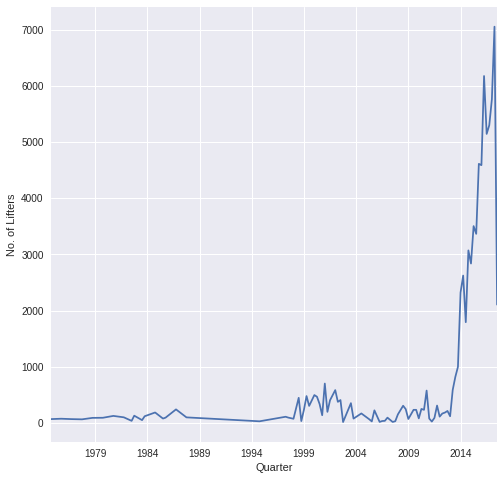

In [276]:
plt.figure(figsize=(8, 8))
df.groupby('Quarter').count()['Sex'].plot()
plt.ylabel('No. of Lifters')

In [281]:
women = df[df['Sex'] == 'F']
men = df[df['Sex'] == 'M']

In [289]:
print (women.shape, men.shape)

(24657, 39) (50647, 39)


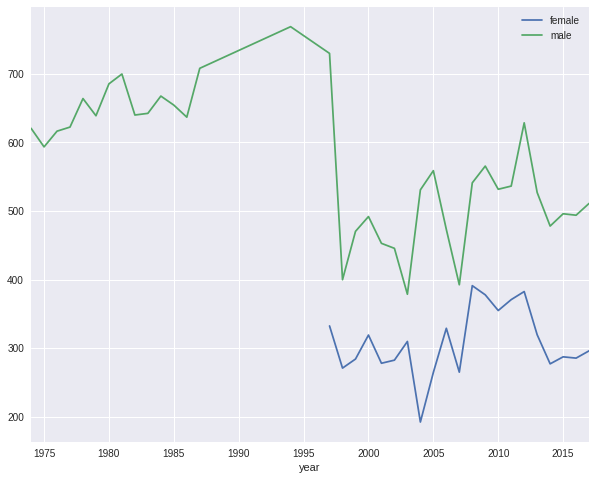

In [285]:
plt.figure(figsize=(10, 8))
women.groupby('year').mean()['TotalKg'].plot(label='female')
men.groupby('year').mean()['TotalKg'].plot(label='male')
plt.legend()

In [357]:
meets_by_year = pd.DataFrame(meets_by_year_count_lifters)

meets_by_year = meets_by_year.reset_index()

meets_by_year.groupby('year').count()['MeetName'].plot()

In [347]:
df.Equipment.value_counts()

Raw           52482
Single-ply    22822
Name: Equipment, dtype: int64

In [349]:
df.groupby('Equipment').mean()

,Age,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,BestBenchKg,BestDeadliftKg,BestSquatKg,BirthYear,BodyweightKg,...,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,TotalKg,Wilks,year
Equipment,,,,,,,,,,,,,,,,,,,,,
Raw,34.328586,79.588743,58.559887,-15.656456,NaN,106.234729,187.621624,159.882817,1986.567221,83.055493,...,136.425030,38.670892,NaN,112.913035,102.992047,40.764051,NaN,418.066589,253.318322,2015.441732
Single-ply,34.812180,71.562287,49.271351,-9.451237,28.0,127.395922,200.717431,195.700540,1985.854233,81.928629,...,115.783759,-18.416414,242.5,105.030348,74.625592,14.999156,250.0,467.136126,255.264871,2007.806590


In [370]:
df.TotalKg.describe()

count    71764.000000
mean       432.543894
std        189.023305
min         17.500000
25%        285.000000
50%        430.000000
75%        570.000000
max       1272.500000
Name: TotalKg, dtype: float64

In [377]:
df.BestBenchKg.describe()

count    71480.000000
mean       112.479471
std         50.380632
min       -290.300000
25%         70.000000
50%        110.000000
75%        145.000000
max        410.000000
Name: BestBenchKg, dtype: float64

In [378]:
df.BestSquatKg.describe()

count    63858.000000
mean       170.281276
std         66.016371
min       -262.500000
25%        117.500000
50%        167.500000
75%        212.500000
max        505.000000
Name: BestSquatKg, dtype: float64

In [379]:
df.BestDeadliftKg.describe()

count    66955.000000
mean       191.356633
std         61.134528
min       -238.100000
25%        142.500000
50%        192.500000
75%        235.000000
max        420.000000
Name: BestDeadliftKg, dtype: float64

In [373]:
df[df['TotalKg'] == 17.5].T

,25219
Age,NaN
Bench1Kg,15
Bench2Kg,17.5
Bench3Kg,-20.5
Bench4Kg,NaN
BestBenchKg,17.5
BestDeadliftKg,NaN
BestSquatKg,NaN
BirthYear,2007
BodyweightKg,28.6


In [374]:
'+' in "190+"

True

In [375]:
'T' in '14-15(T1)'

True

In [376]:
'Teen' in 'Teen I [14-15]'

True

In [382]:
division_list = df.Division.unique().tolist()

In [401]:
np.nan >0

False

In [406]:
#df[df.Division.isnull()].head().T

In [408]:
incorrect_total = (df.TotalKg.isnull() == False) & ((df.BestBenchKg.isnull())| (df.BestSquatKg.isnull()) | (df.BestDeadliftKg.isnull()))

In [411]:
df[incorrect_total].shape

(9760, 39)

In [11]:
df[incorrect_total]['TotalKg'] 

NameError: name 'incorrect_total' is not defined